<a href="https://colab.research.google.com/github/bruce1095/Cross-Asset-Dashbaord/blob/main/Copy_of_gmm_dashboards_by_regionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

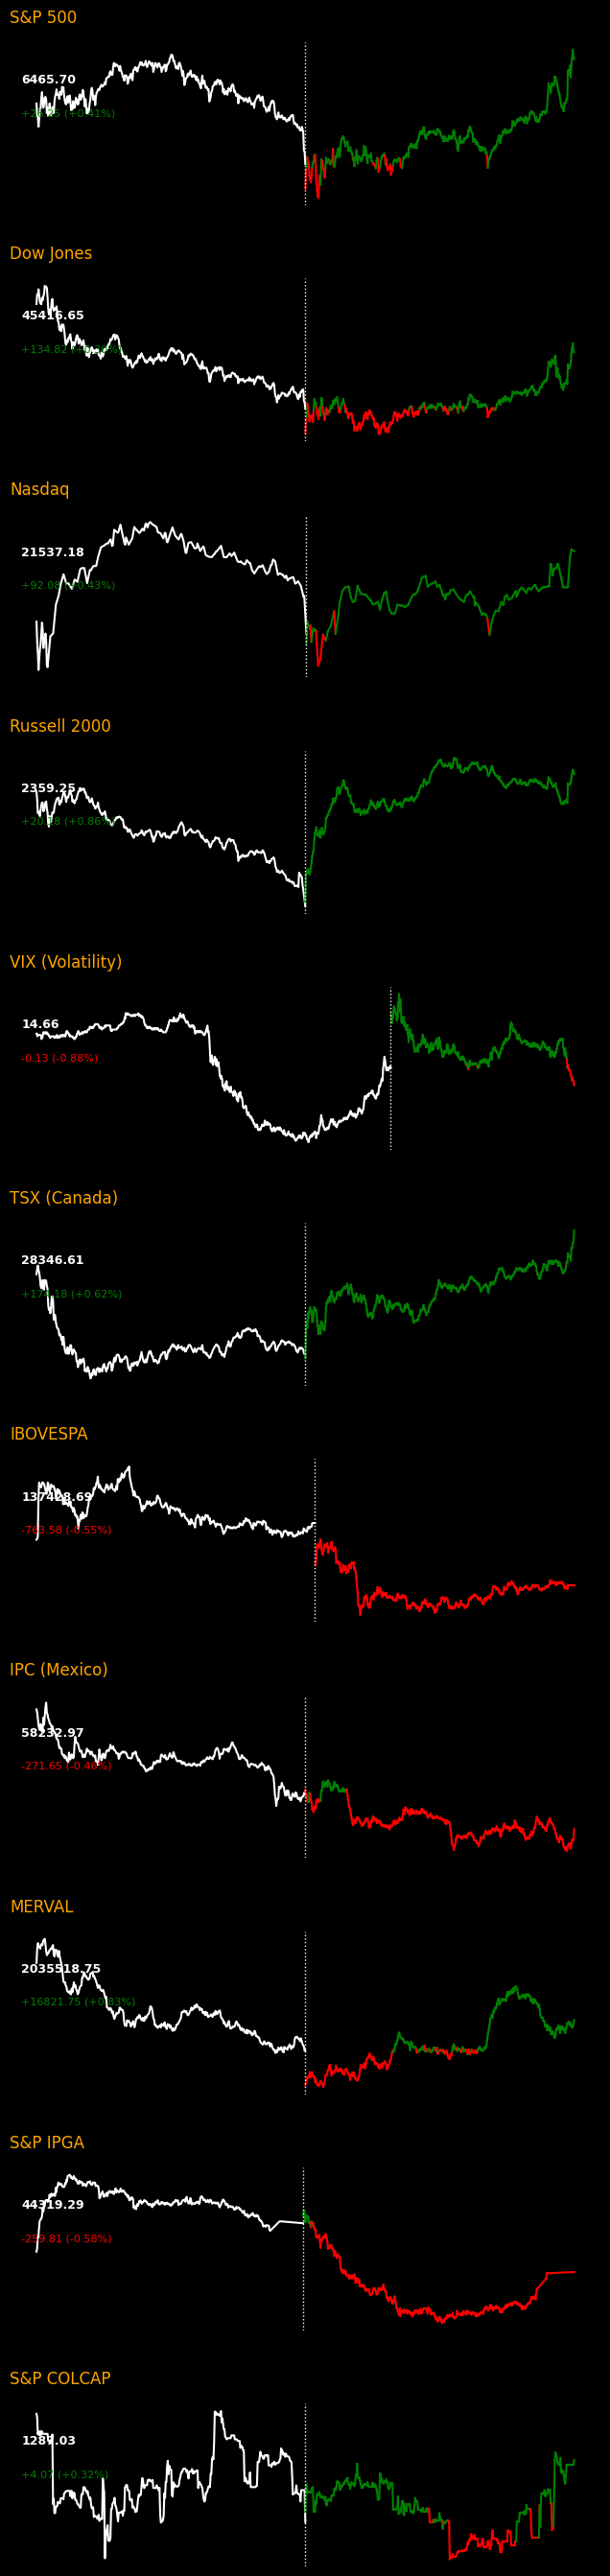

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a sparkline chart for a single index
def compact_stock_sparkline_plot(symbol, ax):
    # Fetch data for the past 5 days
    equity = yf.Ticker(symbol)
    df = equity.history(period="5d", interval="1m")

    # Ensure there's sufficient data
    if df.empty:
        ax.text(0.5, 0.5, "No Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Convert index to EST timezone
    df.index = df.index.tz_convert("US/Eastern")

    # Split data by dates
    grouped = list(df.groupby(df.index.date))
    if len(grouped) < 2:
        ax.text(0.5, 0.5, "Insufficient Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Get the last two sessions
    last_session = grouped[-2][1]  # Second-to-last session
    next_session = grouped[-1][1]  # Last session

    # Ensure we start the next session after 9:30 AM EST (market open)
    next_session = next_session[next_session.index.time >= pd.Timestamp("09:30:00").time()]

    # Shift the second session to follow the first seamlessly
    if not next_session.empty:
        last_time = last_session.index[-1]
        time_shift = last_time - next_session.index[0]
        next_session.index = next_session.index + time_shift

    # Get baseline (last closing price of the first session)
    baseline = last_session['Close'].iloc[-1]

    # Get current price and change metrics
    current_price = round(next_session['Close'].iloc[-1], 2)
    price_change = round(current_price - baseline, 2)
    percent_change = round((price_change / baseline) * 100, 2)

    # Define colors for the text
    change_color = "green" if price_change > 0 else "red"

    # Plot the data
    ax.plot(last_session.index, last_session['Close'], color="white", linewidth=1.5, label="Session 1")
    for i in range(1, len(next_session)):
        color = "green" if next_session['Close'].iloc[i] > baseline else "red"
        ax.plot(next_session.index[i-1:i+1], next_session['Close'].iloc[i-1:i+1], color=color, linewidth=1.5)

    # Add a dotted line separating the sessions
    ax.axvline(x=next_session.index[0], color="white", linestyle="dotted", linewidth=1)

    # Remove axes for a clean sparkline look
    ax.axis('off')

    # Add annotations for price and changes, positioned away from the sparkline
    ax.text(0.02, 0.75, f"{current_price:.2f}", color="white", fontsize=9, weight="bold", transform=ax.transAxes)
    ax.text(0.02, 0.55, f"{price_change:+.2f} ({percent_change:+.2f}%)", color=change_color, fontsize=8, transform=ax.transAxes)

# Define North America indices
north_america_indices = {
    "S&P 500": "^GSPC",
    "Dow Jones": "^DJI",
    "Nasdaq": "^IXIC",
    "Russell 2000": "^RUT",
    "VIX (Volatility)": "^VIX",
    "TSX (Canada)": "^GSPTSE",
    "IBOVESPA":"^BVSP",
    "IPC (Mexico)": "^MXX",
    "MERVAL":"^MERV",
    "S&P IPGA": "SPCLXIGPA.SN",
    "S&P COLCAP":"^SPCOSLCP"
}

# Create the North America Dashboard
def create_north_america_dashboard():
    fig, axes = plt.subplots(
        nrows=len(north_america_indices),
        figsize=(7, len(north_america_indices) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, north_america_indices.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the dashboard
create_north_america_dashboard()

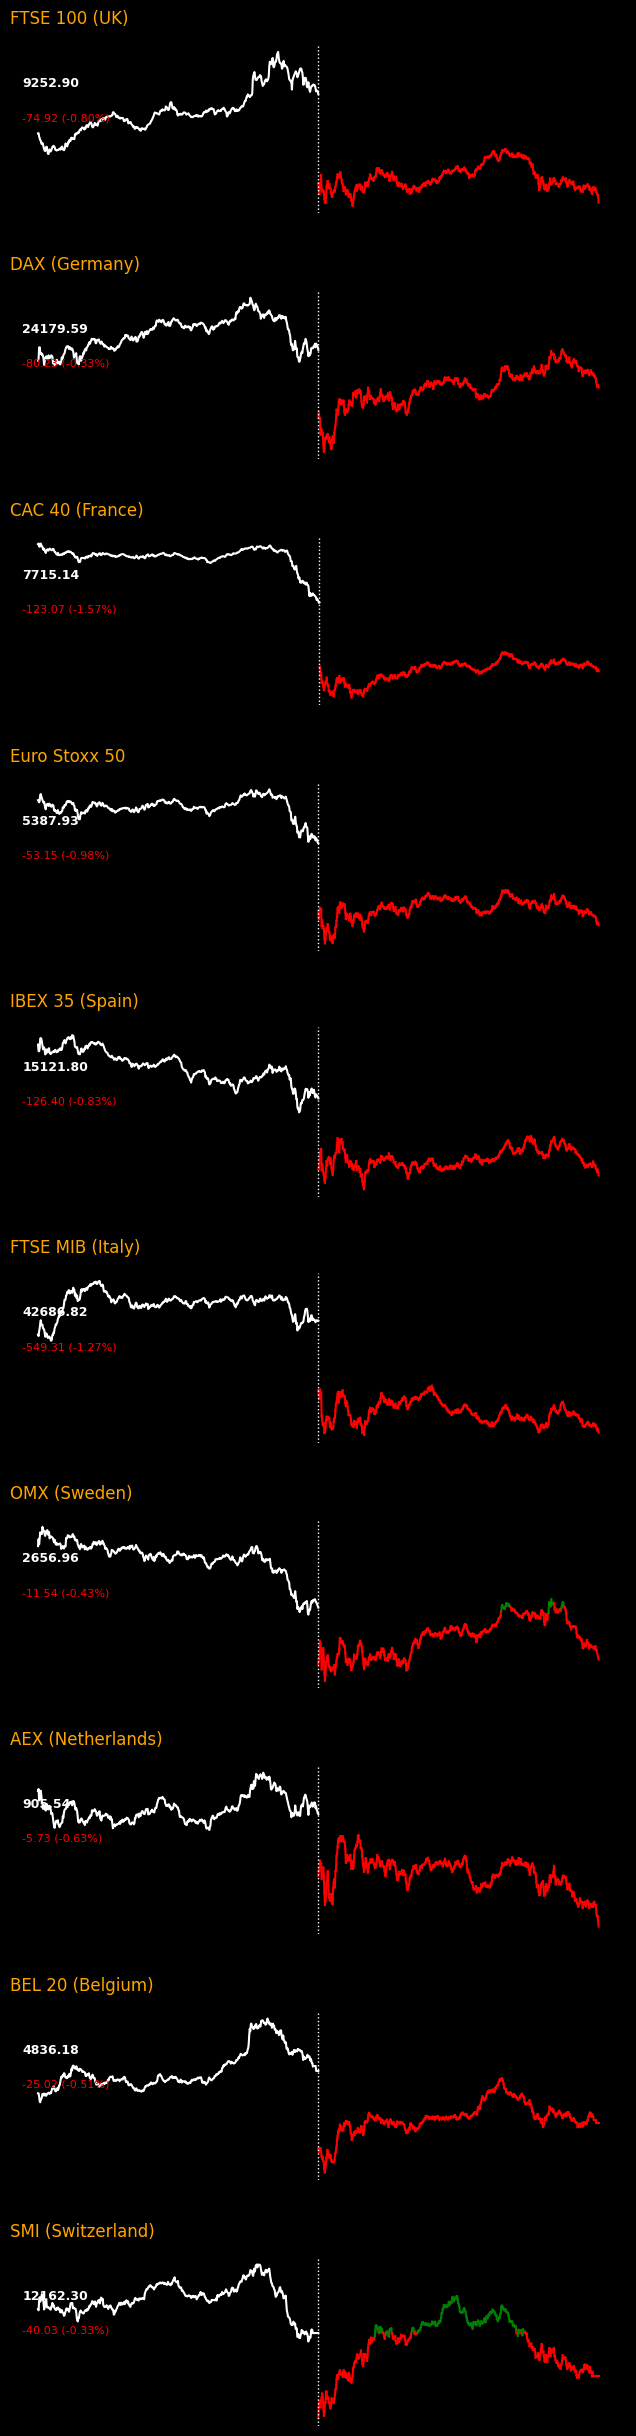

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a sparkline chart for a single index
def compact_stock_sparkline_plot(symbol, ax):
    # Fetch data for the past 5 days
    equity = yf.Ticker(symbol)
    df = equity.history(period="5d", interval="1m")

    # Ensure there's sufficient data
    if df.empty:
        ax.text(0.5, 0.5, "No Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Convert index to CET timezone (Central Europe Time for Europe)
    df.index = df.index.tz_convert("CET")

    # Split data by dates
    grouped = list(df.groupby(df.index.date))
    if len(grouped) < 2:
        ax.text(0.5, 0.5, "Insufficient Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Get the last two sessions
    last_session = grouped[-2][1]  # Second-to-last session
    next_session = grouped[-1][1]  # Last session

    # Ensure we start the next session after 9 AM CET (European market open)
    next_session = next_session[next_session.index.time >= pd.Timestamp("09:00:00").time()]

    # Shift the second session to follow the first seamlessly
    if not next_session.empty:
        last_time = last_session.index[-1]
        time_shift = last_time - next_session.index[0]
        next_session.index = next_session.index + time_shift

    # Get baseline (last closing price of the first session)
    baseline = last_session['Close'].iloc[-1]

    # Get current price and change metrics
    current_price = round(next_session['Close'].iloc[-1], 2)
    price_change = round(current_price - baseline, 2)
    percent_change = round((price_change / baseline) * 100, 2)

    # Define colors for the text
    change_color = "green" if price_change > 0 else "red"

    # Plot the data
    ax.plot(last_session.index, last_session['Close'], color="white", linewidth=1.5, label="Session 1")
    for i in range(1, len(next_session)):
        color = "green" if next_session['Close'].iloc[i] > baseline else "red"
        ax.plot(next_session.index[i-1:i+1], next_session['Close'].iloc[i-1:i+1], color=color, linewidth=1.5)

    # Add a dotted line separating the sessions
    ax.axvline(x=next_session.index[0], color="white", linestyle="dotted", linewidth=1)

    # Remove axes for a clean sparkline look
    ax.axis('off')

    # Add annotations for price and changes, positioned away from the sparkline
    ax.text(0.02, 0.75, f"{current_price:.2f}", color="white", fontsize=9, weight="bold", transform=ax.transAxes)
    ax.text(0.02, 0.55, f"{price_change:+.2f} ({percent_change:+.2f}%)", color=change_color, fontsize=8, transform=ax.transAxes)

# Define European indices
europe_indices = {
    "FTSE 100 (UK)": "^FTSE",
    "DAX (Germany)": "^GDAXI",
    "CAC 40 (France)": "^FCHI",
    "Euro Stoxx 50": "^STOXX50E",
    "IBEX 35 (Spain)": "^IBEX",
    "FTSE MIB (Italy)": "FTSEMIB.MI",
    "OMX (Sweden)": "^OMX",
    "AEX (Netherlands)": "^AEX",
    "BEL 20 (Belgium)": "^BFX",
    "SMI (Switzerland)": "^SSMI",
}

# Create the Europe Dashboard
def create_europe_dashboard():
    fig, axes = plt.subplots(
        nrows=len(europe_indices),
        figsize=(7, len(europe_indices) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, europe_indices.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the dashboard
create_europe_dashboard()

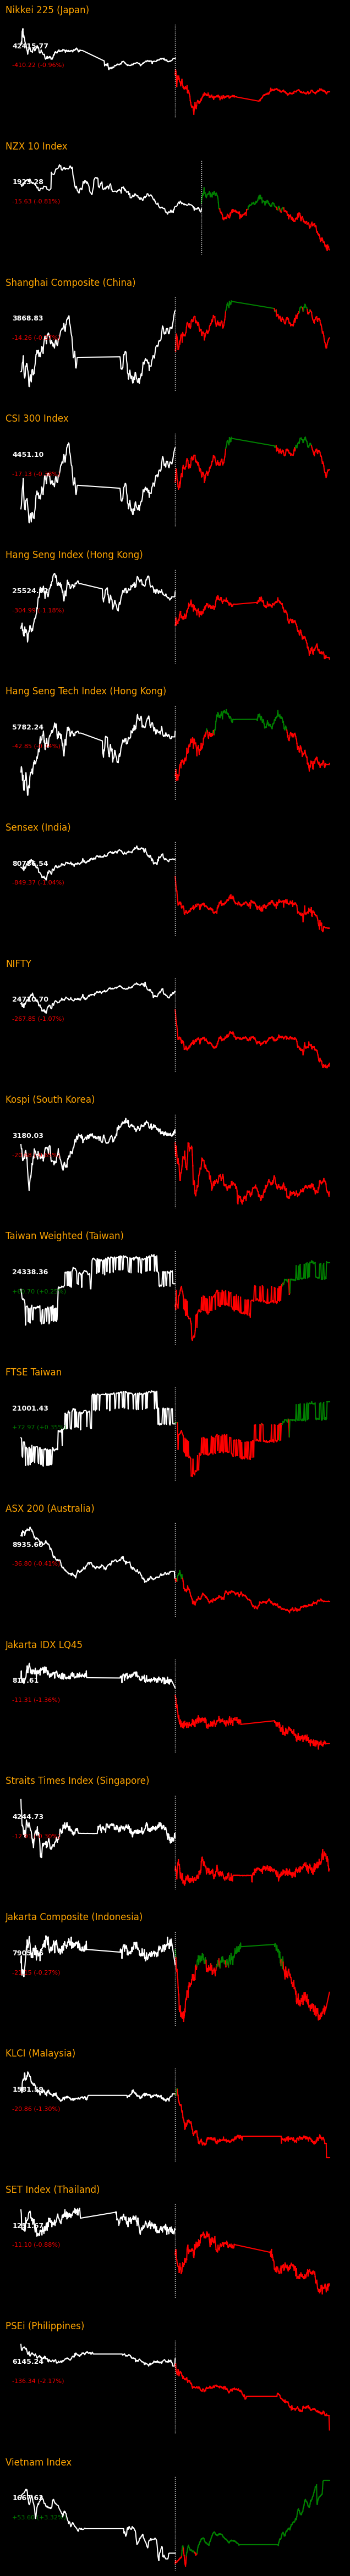

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a sparkline chart for a single index
def compact_stock_sparkline_plot(symbol, ax):
    # Fetch data for the past 5 days
    equity = yf.Ticker(symbol)
    df = equity.history(period="5d", interval="1m")

    # Ensure there's sufficient data
    if df.empty:
        ax.text(0.5, 0.5, "No Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Convert index to local timezone (Asia/Tokyo for consistency across APAC)
    df.index = df.index.tz_convert("Asia/Tokyo")

    # Split data by dates
    grouped = list(df.groupby(df.index.date))
    if len(grouped) < 2:
        ax.text(0.5, 0.5, "Insufficient Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Get the last two sessions
    last_session = grouped[-2][1]  # Second-to-last session
    next_session = grouped[-1][1]  # Last session

    # Ensure we start the next session after 9 AM (APAC market open)
    next_session = next_session[next_session.index.time >= pd.Timestamp("09:00:00").time()]

    # Shift the second session to follow the first seamlessly
    if not next_session.empty:
        last_time = last_session.index[-1]
        time_shift = last_time - next_session.index[0]
        next_session.index = next_session.index + time_shift

    # Get baseline (last closing price of the first session)
    baseline = last_session['Close'].iloc[-1]

    # Get current price and change metrics
    current_price = round(next_session['Close'].iloc[-1], 2)
    price_change = round(current_price - baseline, 2)
    percent_change = round((price_change / baseline) * 100, 2)

    # Define colors for the text
    change_color = "green" if price_change > 0 else "red"

    # Plot the data
    ax.plot(last_session.index, last_session['Close'], color="white", linewidth=1.5, label="Session 1")
    for i in range(1, len(next_session)):
        color = "green" if next_session['Close'].iloc[i] > baseline else "red"
        ax.plot(next_session.index[i-1:i+1], next_session['Close'].iloc[i-1:i+1], color=color, linewidth=1.5)

    # Add a dotted line separating the sessions
    ax.axvline(x=next_session.index[0], color="white", linestyle="dotted", linewidth=1)

    # Remove axes for a clean sparkline look
    ax.axis('off')

    # Add annotations for price and changes, positioned away from the sparkline
    ax.text(0.02, 0.75, f"{current_price:.2f}", color="white", fontsize=9, weight="bold", transform=ax.transAxes)
    ax.text(0.02, 0.55, f"{price_change:+.2f} ({percent_change:+.2f}%)", color=change_color, fontsize=8, transform=ax.transAxes)

# Define Asia-Pacific indices
asia_indices = {
    "Nikkei 225 (Japan)": "^N225",
    "NZX 10 Index": "^NZ10",
    "Shanghai Composite (China)": "000001.SS",
    "CSI 300 Index": "000300.SS",
    "Hang Seng Index (Hong Kong)": "^HSI",
    "Hang Seng Tech Index (Hong Kong)": "HSTECH.HK",
    "Sensex (India)": "^BSESN",
    "NIFTY":"^NSEI",
    "Kospi (South Korea)": "^KS11",
    "Taiwan Weighted (Taiwan)": "^TWII",
    "FTSE Taiwan":"^TSE50",
    "ASX 200 (Australia)": "^AXJO",
    "Jakarta IDX LQ45": "^JKLQ45",
    "Straits Times Index (Singapore)": "^STI",
    "Jakarta Composite (Indonesia)": "^JKSE",
    "KLCI (Malaysia)": "^KLSE",
    "SET Index (Thailand)": "^SET.BK",
    "PSEi (Philippines)": "PSEI.PS",
    "Vietnam Index": "^VNINDEX.VN",
}

# Create the Asia-Pacific Dashboard
def create_asia_dashboard():
    fig, axes = plt.subplots(
        nrows=len(asia_indices),
        figsize=(7, len(asia_indices) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, asia_indices.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the dashboard
create_asia_dashboard()

In [ ]:
pip install yfinance --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52
